In [16]:
from base_types import IdxValue, DataElements
from data import Data
from plot import PricePlot
from utils import milliseconds_to_date
from base_types import DataType
import json

def read_data(symbol, exp_name, start, end):
    start_str = milliseconds_to_date(start) + ' UTC+8'
    end_str = milliseconds_to_date(end + 1) + ' UTC+8'

    data = Data(symbol, DataType.INTERVAL_1MINUTE, start_str=start_str, end_str=end_str, is_futures=True)
    # print(data.start_time())
    # print(data.end_time())

    base_path = '.\\log\\{}\\{}_start_{}_end_{}_'.format(exp_name, symbol, data.start_time(), data.end_time())
    trade_info_path = base_path + 'trade_info.json'
    vertices_path = base_path + 'vertices.json'
    earn_path = base_path + 'earn_points.json'

    with open(trade_info_path, 'r') as f:
        json_data = f.read()
        trade_info = json.loads(json_data)

    with open(vertices_path, 'r') as f:
        json_data = f.read()
        vertices = json.loads(json_data)

    with open(earn_path, 'r') as f:
        json_data = f.read()
        earn_points_dict = json.loads(json_data)

    # print(trade_info.keys())
    # print(vertices.keys())
    # print(earn_points_dict.keys())

    buy_points = IdxValue(trade_info['buy_time'], trade_info['buy_price'])
    sell_points = IdxValue(trade_info['sell_time'], trade_info['sell_price'])
    tops = IdxValue(vertices['top_time'], vertices['top_value'])
    bottoms = IdxValue(vertices['bottom_time'], vertices['bottom_value'])
    earn_points = IdxValue(earn_points_dict['earn_idx'], earn_points_dict['earn_value'])

    for point in [buy_points, sell_points, tops, bottoms]:
        data.time_list_to_idx(point.idx)
    
    return data, buy_points, sell_points, tops, bottoms, earn_points

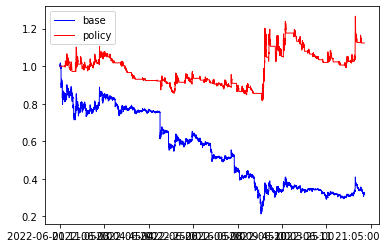

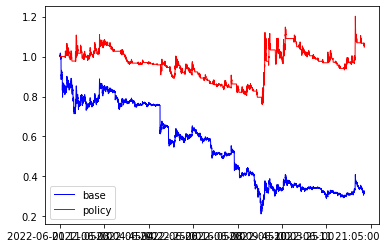

In [18]:
%matplotlib inline
# %matplotlib qt5

def plot(data: Data, buy_points: IdxValue, sell_points: IdxValue, 
        tops: IdxValue, bottoms: IdxValue, earn_points: IdxValue):
    
    open, high, low, close, open_time = data.get_columns([
        DataElements.OPEN, DataElements.HIGH, DataElements.LOW, DataElements.CLOSE, DataElements.OPEN_TIME])    
    open_time = open_time.map(milliseconds_to_date)
    
    fig = PricePlot(open, high, low, close, open_time)

    points = [
        PricePlot.Points(idx=buy_points.idx, value=buy_points.value, s=90, c='r', label='buy'),
        PricePlot.Points(idx=sell_points.idx, value=sell_points.value, s=90, c='g', label='sell'),
        PricePlot.Points(idx=tops.idx, value=tops.value, s=30, c='b', label='top'),
        PricePlot.Points(idx=bottoms.idx, value=bottoms.value, s=30, c='y', label='bottoms'),
    ]
    fig.plot(plot_candle=data.len()<=1100, points=points, earn_point=earn_points)



plot(*read_data(
    symbol = 'LUNA2BUSD',
    exp_name = 'threshold_20_multi_0.5',
    start = 1654052700000,
    end = 1655080739999
))
plot(*read_data(
    symbol = 'LUNA2BUSD',
    exp_name = 'threshold_20',
    start = 1654052700000,
    end = 1655080739999
))